In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_14-41-37_train.csv' , header=0)
# identify the unique values in the 'ground_truth' column
unique_ids = train['ground_truth'].value_counts()[train['ground_truth'].value_counts() == 1].index
# filter out the rows with unique 'ground_truth' values
train = train[~train['ground_truth'].isin(unique_ids)]
train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.000036,-0.005839,0.000036,-0.000036,-0.005839,0.000036,-0.000036,-0.000036,-0.000036,-0.000036,...,0.020859,-0.021720,-0.002635,-0.021803,-0.023519,0.019338,0.002390,-0.025528,-0.003180,http://www.semanticweb.org/needed-terms#001
1,-0.002563,0.004352,-0.000925,-0.002781,-0.003307,-0.006591,0.007723,0.000900,0.002940,-0.001755,...,-0.026561,-0.026467,0.011546,0.007113,0.029829,0.014343,-0.002327,0.024326,-0.010424,http://semanticscience.org/resource/SIO_001279
2,0.000291,0.000291,-0.003586,0.000291,0.003586,-0.003586,0.000291,-0.000291,0.003586,0.000291,...,0.002584,-0.002584,-0.002843,-0.002584,-0.002584,0.002584,0.002843,-0.002584,-0.002843,no_link_known
3,-0.001707,0.000702,-0.001692,-0.002502,0.000112,-0.004317,-0.000159,-0.000713,0.004310,0.002457,...,0.024196,-0.025993,-0.007683,-0.023339,-0.023716,0.022958,0.009925,-0.030913,-0.006875,http://www.semanticweb.org/needed-terms#001
4,0.002947,-0.002712,-0.003596,0.001877,0.003449,0.003197,-0.002988,0.004427,0.003860,0.002470,...,-0.037756,-0.021971,0.015067,-0.036230,0.034744,0.031243,0.053082,0.042770,0.049509,http://semanticscience.org/resource/SIO_001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364931,-0.001504,-0.001504,-0.001504,0.001504,-0.001504,-0.001504,0.001504,0.001504,0.001504,0.001504,...,0.016140,-0.025934,-0.008050,-0.023769,-0.021450,0.023729,0.008236,-0.023763,-0.008058,http://www.semanticweb.org/needed-terms#001
2364932,0.006778,0.001943,0.001943,0.010295,0.006778,-0.005460,-0.006778,-0.001943,0.010295,0.010295,...,-0.010916,0.015125,-0.016395,0.014115,0.011327,-0.010299,0.015740,0.014983,-0.004980,no_link_known
2364933,-0.003663,-0.007995,-0.002343,0.002343,-0.003663,0.001989,-0.001989,0.007995,0.002343,0.002343,...,-0.053474,0.018565,0.041466,-0.058139,0.033773,0.038972,0.043669,-0.018444,0.033126,no_link_known
2364934,-0.010859,-0.007195,-0.002744,-0.005639,-0.009460,0.000825,-0.002338,0.005121,0.000990,-0.002317,...,0.013257,-0.010965,-0.013171,-0.013267,-0.013147,0.013259,0.013239,-0.013260,-0.011003,http://www.semanticweb.org/needed-terms#001


In [3]:
# Validation set
val = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_14-41-37_val.csv' , header=0)
# identify the unique values in the 'ground_truth' column
unique_ids = val['ground_truth'].value_counts()[val['ground_truth'].value_counts() == 1].index
val = val[~val['ground_truth'].isin(unique_ids)]
val

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ground_truth
0,0.005719,0.031074,0.019797,-0.022057,0.005970,0.006025,-0.005971,-0.020629,-0.014648,-0.020727,...,-0.005825,0.017589,-0.015766,0.014745,0.015680,-0.014800,0.013449,0.014003,-0.011130,http://www.semanticweb.org/needed-terms#001
1,0.005328,0.005328,0.005328,0.003828,0.005328,-0.003828,-0.005328,-0.005328,0.003828,0.003828,...,-0.014161,-0.022191,0.006366,0.021815,0.017315,-0.017475,-0.020981,0.027694,-0.001360,http://www.semanticweb.org/needed-terms#001
2,0.006690,0.003762,-0.001952,0.007878,0.006690,-0.004949,-0.013007,-0.003762,0.014194,0.014194,...,-0.008413,0.012687,-0.012687,0.012687,0.012687,-0.012687,0.012687,0.012687,-0.005638,http://www.semanticweb.org/needed-terms#001
3,0.003668,-0.009859,-0.014731,0.015014,0.011187,0.007794,-0.009859,0.015014,0.020173,0.009859,...,-0.007629,0.018029,-0.014905,0.018029,0.018029,-0.018029,0.014905,0.018029,-0.004141,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
4,0.003491,0.008781,0.008781,-0.002701,0.003491,-0.002589,-0.003491,-0.008781,0.002589,-0.002701,...,0.018327,0.018774,0.012380,0.018117,-0.018327,-0.018117,0.018774,0.014758,0.009021,no_link_known
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233245,-0.022956,-0.005243,0.019383,-0.008621,-0.016769,0.022956,-0.001602,0.017736,-0.021202,-0.020409,...,-0.008262,0.013556,-0.013556,0.013556,0.013556,-0.013556,0.013556,0.013556,-0.008289,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
233246,0.010599,0.021032,0.021731,-0.027554,0.012082,0.010564,-0.012188,-0.020043,-0.016679,-0.019854,...,-0.001886,-0.008664,-0.000052,-0.005794,0.002313,0.005795,-0.008627,-0.005794,-0.006365,no_link_known
233247,-0.015210,-0.020290,-0.020290,-0.011722,-0.015210,0.016801,0.015210,0.020290,-0.011722,-0.011722,...,0.002679,0.009612,-0.022392,0.011507,0.011247,-0.023070,0.017845,0.011134,-0.019385,no_link_known
233248,-0.004290,0.000723,-0.004290,0.004290,-0.004290,0.000723,0.004290,0.004290,0.004290,-0.000723,...,-0.008275,0.018876,-0.011476,0.016324,0.011572,-0.018436,0.015418,0.015421,-0.006859,http://semanticscience.org/resource/SIO_000281


In [4]:
# Experiment setup=2
s = setup(train, target = 'ground_truth', fold_strategy = 'stratifiedkfold', fold=10, train_size = 0.8, n_jobs=-1, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,253
1,Target,ground_truth
2,Target type,Multiclass
3,Target mapping,"http://semanticscience.org/resource/SIO_000281: 0, http://semanticscience.org/resource/SIO_000628: 1, http://semanticscience.org/resource/SIO_001279: 2, http://www.semanticweb.org/needed-terms#001: 3, http://www.semanticweb.org/needed-terms#002: 4, http://www.semanticweb.org/needed-terms#004: 5, http://www.semanticweb.org/needed-terms#009: 6, http://www.w3.org/1999/02/22-rdf-syntax-ns#label: 7, http://www.w3.org/1999/02/22-rdf-syntax-ns#type: 8, http://www.w3.org/2000/01/rdf-schema#subClassOf: 9, no_link_known: 10"
4,Original data shape,"(2364936, 101)"
5,Transformed data shape,"(2364936, 101)"
6,Transformed train set shape,"(1891948, 101)"
7,Transformed test set shape,"(472988, 101)"
8,Numeric features,100
9,Preprocess,True


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


# K Neighbors Classifier

In [5]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9481,0.9822,0.9481,0.9497,0.9480,0.9250,0.9257
1,0.9487,0.9823,0.9487,0.9502,0.9485,0.9258,0.9265
2,0.9490,0.9827,0.9490,0.9504,0.9488,0.9262,0.9269
3,0.9487,0.9825,0.9487,0.9502,0.9486,0.9258,0.9265
4,0.9484,0.9823,0.9484,0.9498,0.9481,0.9253,0.9260
5,0.9490,0.9827,0.9490,0.9504,0.9488,0.9261,0.9269
6,0.9487,0.9828,0.9487,0.9502,0.9486,0.9258,0.9266
7,0.9495,0.9830,0.9495,0.9509,0.9494,0.9270,0.9276
8,0.9483,0.9825,0.9483,0.9497,0.9482,0.9252,0.9259


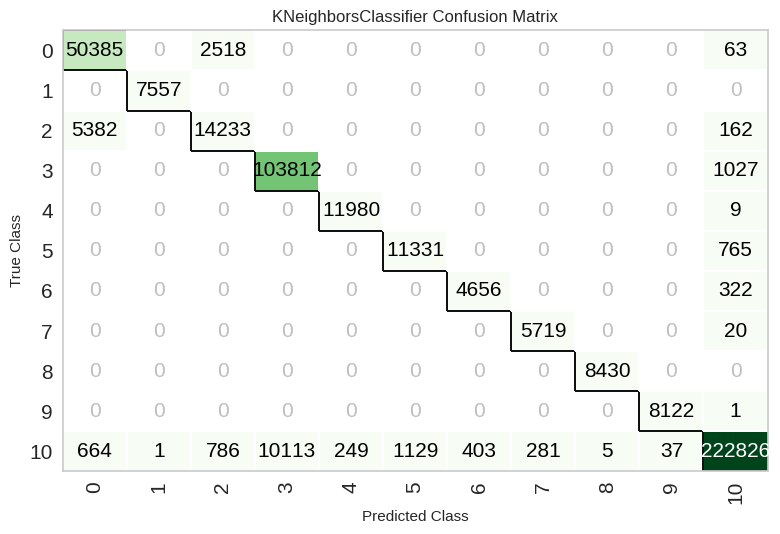

In [6]:
plot_model(knn, plot = 'confusion_matrix')

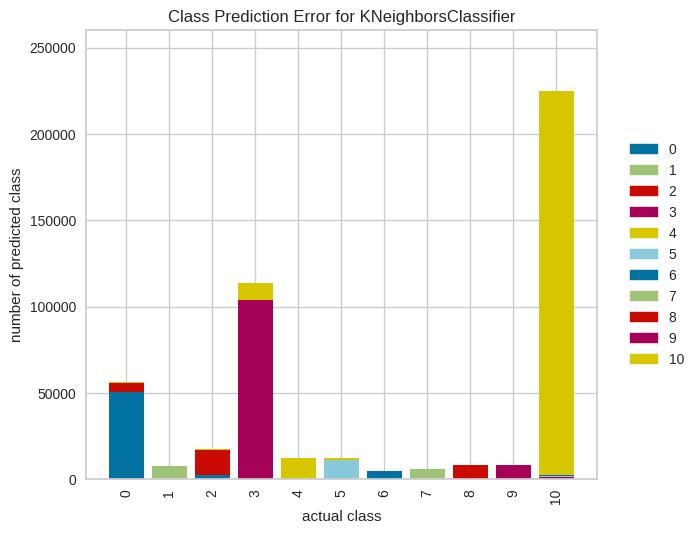

In [7]:
plot_model(knn, plot = 'error')

In [8]:
plot_model(knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


In [9]:
knn_val_pred = predict_model(knn, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4386,0,0,0,0,0.0032,0.0043


In [10]:
save_model(knn, 'knn.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                          

# Naive Bayes

In [11]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9217,0.9836,0.9217,0.9308,0.9234,0.8886,0.8906
1,0.9226,0.9835,0.9226,0.9320,0.9243,0.8899,0.8919
2,0.9225,0.9838,0.9225,0.9319,0.9242,0.8897,0.8918
3,0.9230,0.9837,0.9230,0.9319,0.9246,0.8903,0.8922
4,0.9219,0.9839,0.9219,0.9312,0.9235,0.8888,0.8908
5,0.9229,0.9837,0.9229,0.9321,0.9246,0.8903,0.8922
6,0.9223,0.9835,0.9223,0.9314,0.9240,0.8894,0.8914
7,0.9229,0.9840,0.9229,0.9321,0.9246,0.8902,0.8921
8,0.9224,0.9839,0.9224,0.9315,0.9241,0.8895,0.8915


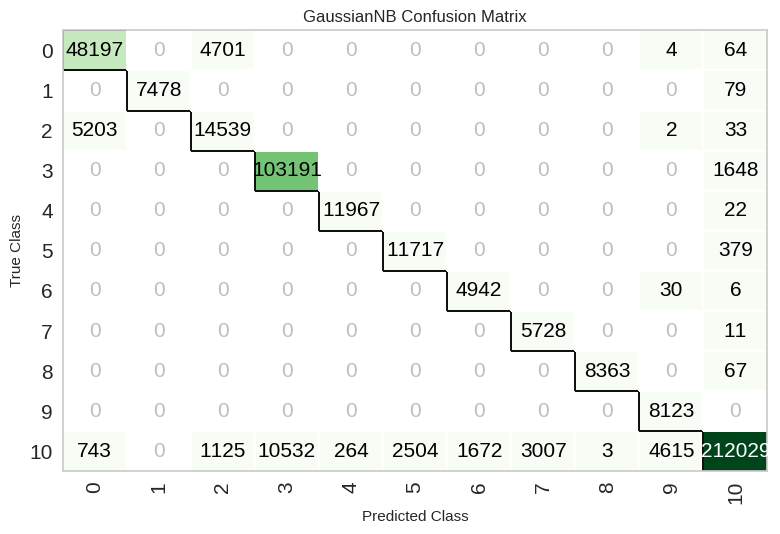

In [12]:
plot_model(nb, plot = 'confusion_matrix')

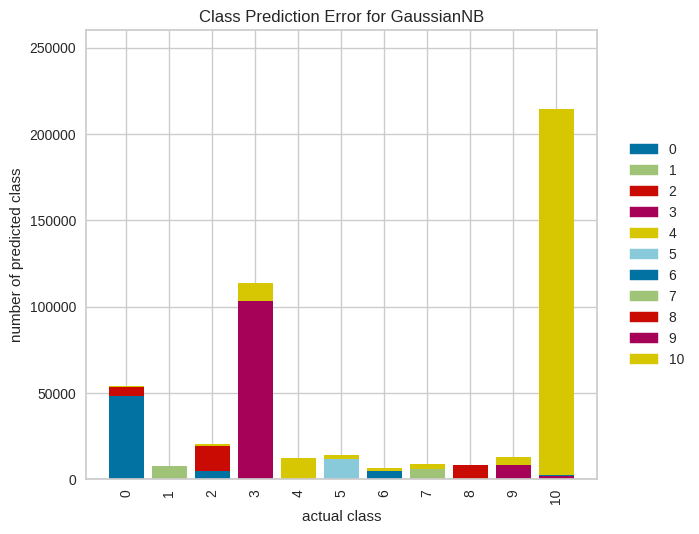

In [13]:
plot_model(nb, plot = 'error')

In [14]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,1e-09


In [15]:
nb_val_pred = predict_model(nb, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.3469,0,0,0,0,0.0600,0.0673


In [16]:
save_model(nb, 'nb.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categoric

# Decision Tree Classifier

In [17]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9173,0.9387,0.9173,0.9173,0.9173,0.8789,0.8789
1,0.9170,0.9385,0.9170,0.9171,0.9170,0.8785,0.8785
2,0.9182,0.9394,0.9182,0.9180,0.9181,0.8802,0.8802
3,0.9178,0.9390,0.9178,0.9177,0.9177,0.8795,0.8795
4,0.9172,0.9385,0.9172,0.9172,0.9172,0.8787,0.8787
5,0.9180,0.9390,0.9180,0.9179,0.9179,0.8798,0.8798
6,0.9176,0.9389,0.9176,0.9177,0.9176,0.8792,0.8793
7,0.9186,0.9395,0.9186,0.9187,0.9186,0.8807,0.8808
8,0.9170,0.9382,0.9170,0.9169,0.9169,0.8784,0.8784


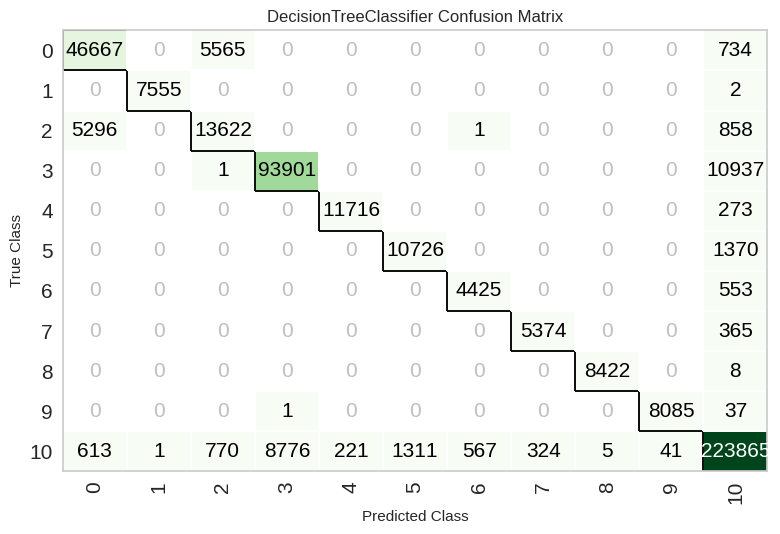

In [18]:
plot_model(dt, plot = 'confusion_matrix')

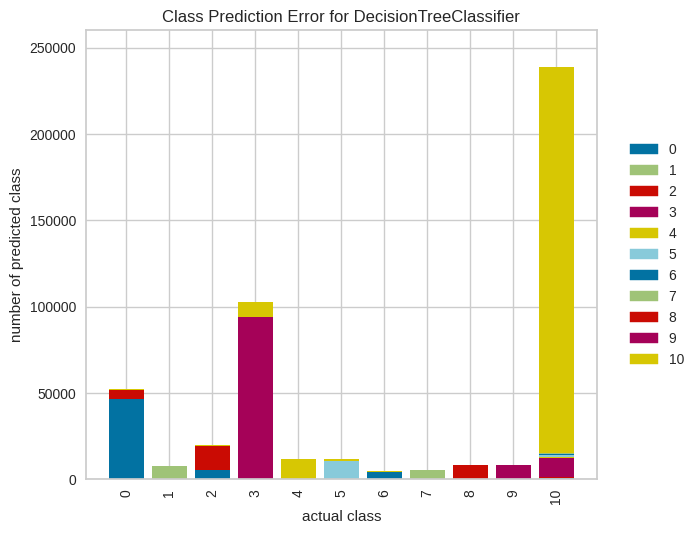

In [19]:
plot_model(dt, plot = 'error')

In [20]:
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [21]:
dt_val_pred = predict_model(dt, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.4420,0,0,0,0,0.0004,0.0005


In [22]:
save_model(dt, 'dt.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('

# SVM - Linear Kernel

In [23]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9003,0.0000,0.9003,0.8746,0.8846,0.8520,0.8531
1,0.9014,0.0000,0.9014,0.8757,0.8860,0.8538,0.8549
2,0.9013,0.0000,0.9013,0.8916,0.8859,0.8536,0.8547
3,0.9009,0.0000,0.9009,0.8751,0.8852,0.8529,0.8540
4,0.9012,0.0000,0.9012,0.8877,0.8856,0.8534,0.8545
5,0.9007,0.0000,0.9007,0.8908,0.8851,0.8526,0.8537
6,0.9013,0.0000,0.9013,0.8756,0.8860,0.8537,0.8547
7,0.9027,0.0000,0.9027,0.8927,0.8873,0.8556,0.8566
8,0.9010,0.0000,0.9010,0.8911,0.8855,0.8531,0.8542


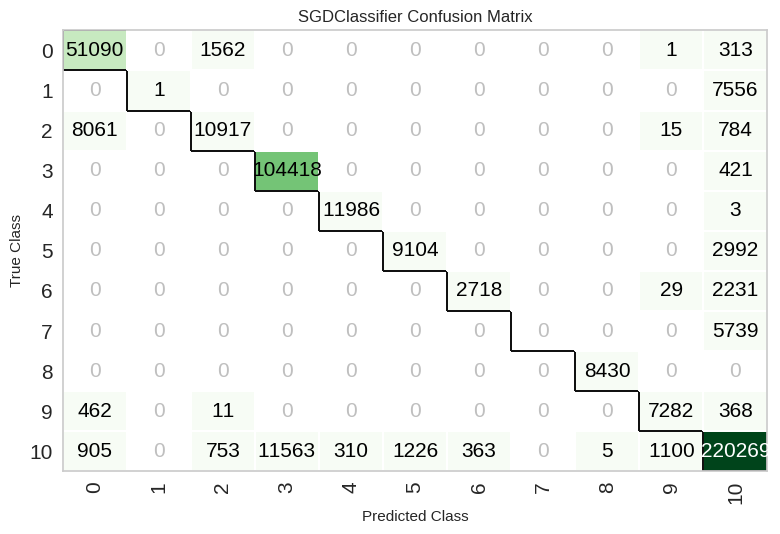

In [24]:
plot_model(svm, plot = 'confusion_matrix')

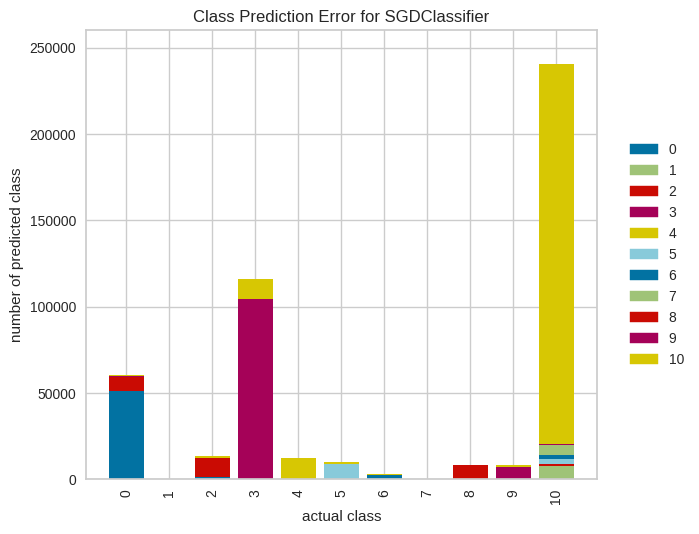

In [25]:
plot_model(svm, plot = 'error')

In [26]:
plot_model(svm, plot = 'parameter')

,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


In [27]:
svm_val_pred = predict_model(svm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4170,0,0,0,0,-0.1075,-0.1719


In [28]:
save_model(svm, 'svm.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                 ('trained_model',
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
                  

# Ridge Classifier

In [29]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9191,0.0000,0.9191,0.9192,0.9131,0.8817,0.8821
1,0.9199,0.0000,0.9199,0.9214,0.9140,0.8830,0.8834
2,0.9201,0.0000,0.9201,0.9201,0.9142,0.8832,0.8836
3,0.9201,0.0000,0.9201,0.9205,0.9141,0.8832,0.8836
4,0.9193,0.0000,0.9193,0.9191,0.9133,0.8820,0.8824
5,0.9201,0.0000,0.9201,0.9208,0.9141,0.8832,0.8836
6,0.9192,0.0000,0.9192,0.9206,0.9132,0.8818,0.8822
7,0.9205,0.0000,0.9205,0.9192,0.9146,0.8837,0.8841
8,0.9193,0.0000,0.9193,0.9198,0.9134,0.8820,0.8824


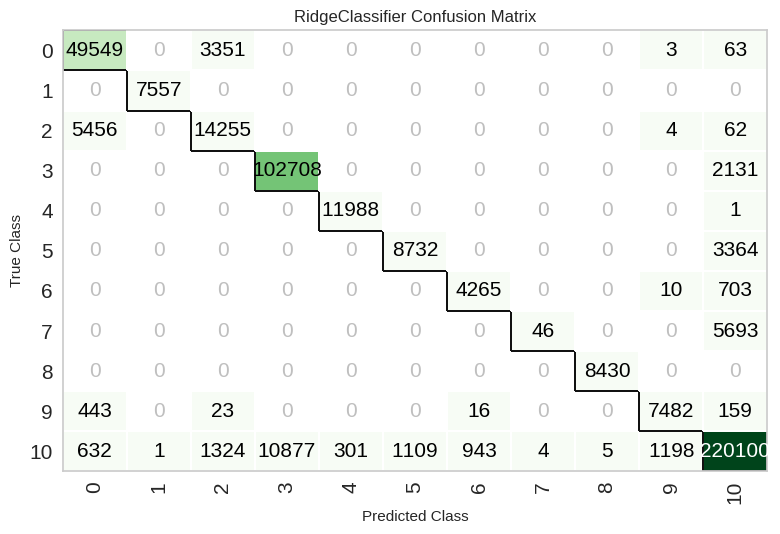

In [30]:
plot_model(ridge, plot = 'confusion_matrix')

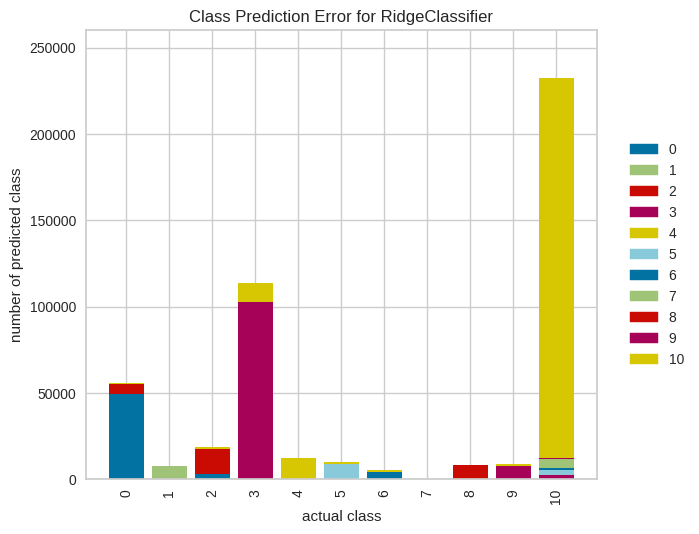

In [31]:
plot_model(ridge, plot = 'error')

In [32]:
plot_model(ridge, plot = 'parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,253
solver,auto
tol,0.0001


In [33]:
ridge_val_pred = predict_model(ridge, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4174,0,0,0,0,-0.0955,-0.1472


In [34]:
save_model(ridge, 'ridge.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                          

# Random Forest

In [35]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9518,0.9908,0.9518,0.9535,0.9518,0.9303,0.9311
1,0.9519,0.9909,0.9519,0.9536,0.9519,0.9305,0.9312
2,0.9524,0.9911,0.9524,0.9541,0.9525,0.9312,0.9320
3,0.9524,0.9911,0.9524,0.9541,0.9524,0.9312,0.9319
4,0.9519,0.9911,0.9519,0.9535,0.9518,0.9304,0.9311
5,0.9521,0.9911,0.9521,0.9538,0.9521,0.9307,0.9315
6,0.9518,0.9907,0.9518,0.9535,0.9518,0.9303,0.9310
7,0.9531,0.9911,0.9531,0.9547,0.9531,0.9321,0.9328
8,0.9516,0.9910,0.9516,0.9533,0.9516,0.9300,0.9307


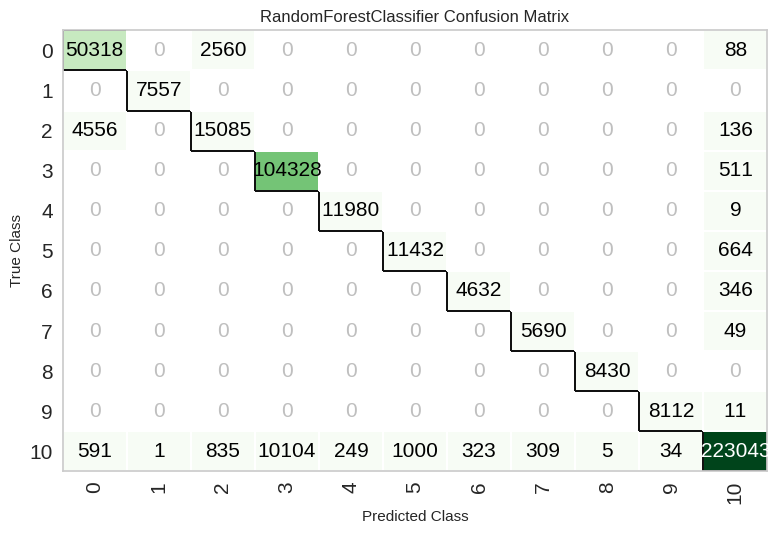

In [36]:
plot_model(rf, plot = 'confusion_matrix')

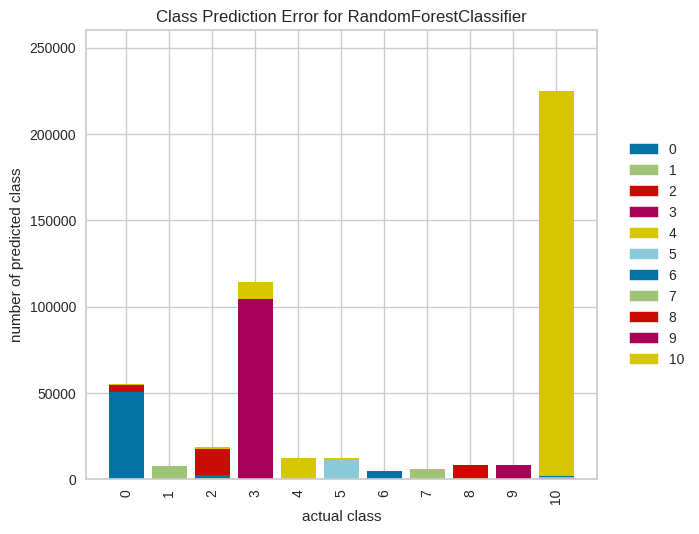

In [37]:
plot_model(rf, plot = 'error')

In [38]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [39]:
rf_val_pred = predict_model(rf, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4393,0,0,0,0,0.0050,0.0068


In [40]:
save_model(rf, 'rf.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_n

# Quadratic Discriminant Analysis

In [41]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8792,0.9347,0.8792,0.8525,0.8646,0.8230,0.8236
1,0.8800,0.9346,0.8800,0.8535,0.8655,0.8243,0.8250
2,0.8795,0.9349,0.8795,0.8529,0.8650,0.8235,0.8241
3,0.8796,0.9349,0.8796,0.8528,0.8651,0.8235,0.8242
4,0.8796,0.9350,0.8796,0.8528,0.8651,0.8236,0.8243
5,0.8802,0.9349,0.8802,0.8535,0.8657,0.8245,0.8251
6,0.8798,0.9348,0.8798,0.8532,0.8653,0.8240,0.8246
7,0.8805,0.9351,0.8805,0.8538,0.8660,0.8249,0.8255
8,0.8797,0.9352,0.8797,0.8531,0.8652,0.8238,0.8244


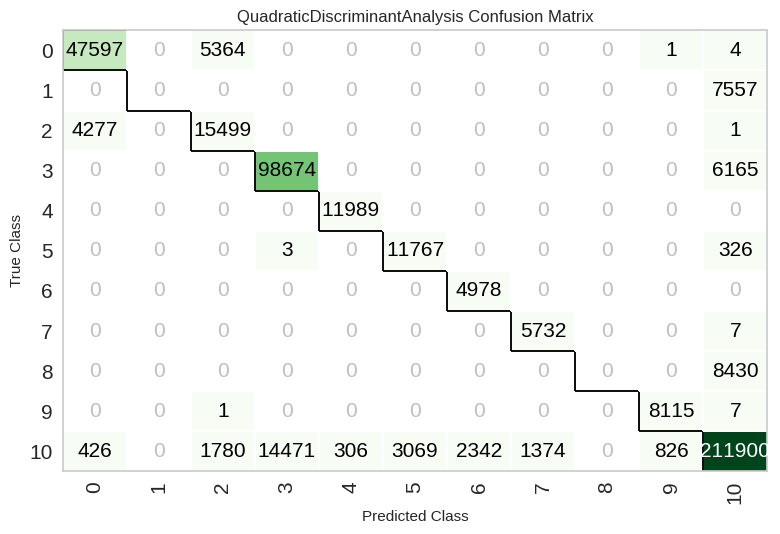

In [42]:
plot_model(qda, plot = 'confusion_matrix')

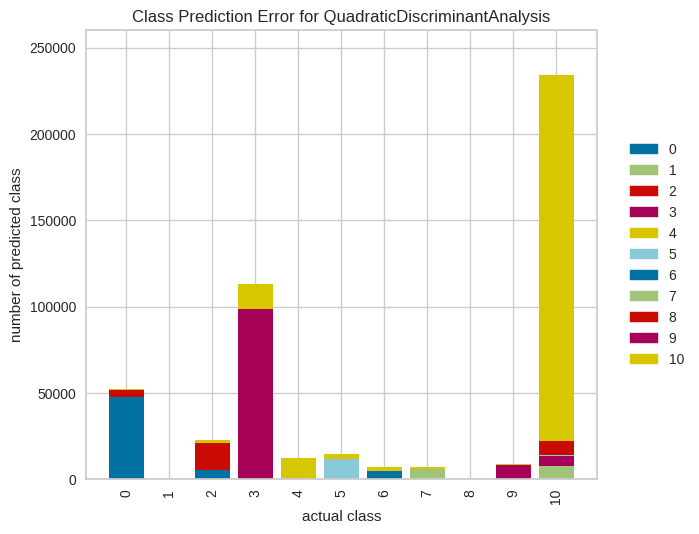

In [43]:
plot_model(qda, plot = 'error')

In [44]:
plot_model(qda, plot = 'parameter')

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


In [45]:
qda_val_pred = predict_model(qda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.3884,0,0,0,0,0.0142,0.0164


In [46]:
save_model(qda, 'qda.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                 

# Linear Discriminant Analysis

In [47]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9264,0.9840,0.9264,0.9347,0.9280,0.8950,0.8968
1,0.9267,0.9837,0.9267,0.9354,0.9284,0.8955,0.8974
2,0.9264,0.9841,0.9264,0.9351,0.9282,0.8951,0.8970
3,0.9267,0.9842,0.9267,0.9352,0.9284,0.8955,0.8973
4,0.9262,0.9842,0.9262,0.9349,0.9279,0.8947,0.8966
5,0.9267,0.9841,0.9267,0.9355,0.9285,0.8955,0.8974
6,0.9263,0.9839,0.9263,0.9349,0.9280,0.8949,0.8967
7,0.9273,0.9842,0.9273,0.9357,0.9291,0.8963,0.8981
8,0.9264,0.9845,0.9264,0.9348,0.9281,0.8950,0.8968


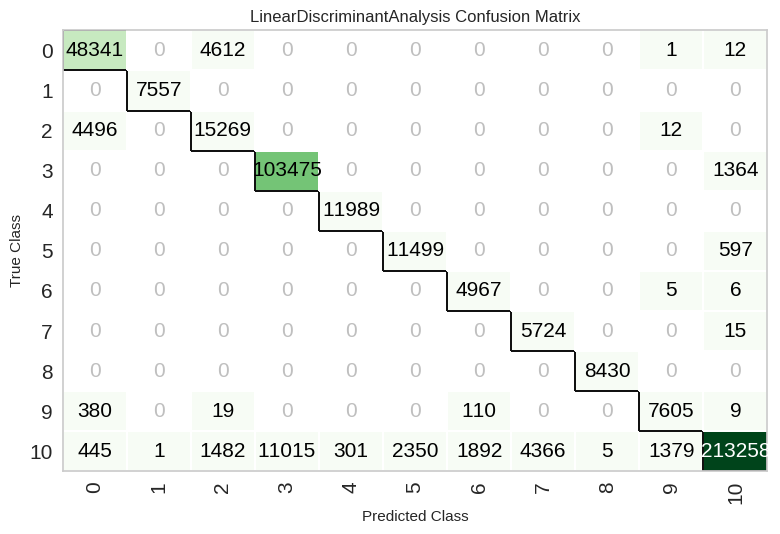

In [48]:
plot_model(lda, plot = 'confusion_matrix')

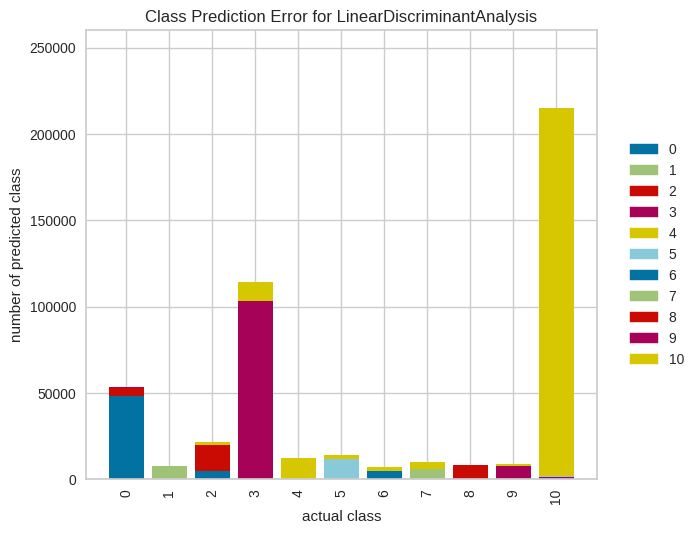

In [49]:
plot_model(lda, plot = 'error')

In [50]:
plot_model(lda, plot = 'parameter')

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [51]:
lda_val_pred = predict_model(lda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.3363,0,0,0,0,-0.0181,-0.0201


In [52]:
save_model(lda, 'lda.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                          

# Extra Trees

In [53]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9504,0.9906,0.9504,0.9521,0.9504,0.9283,0.9291
1,0.9507,0.9907,0.9507,0.9524,0.9507,0.9287,0.9295
2,0.9512,0.9908,0.9512,0.9529,0.9512,0.9295,0.9302
3,0.9511,0.9908,0.9511,0.9528,0.9511,0.9292,0.9300
4,0.9506,0.9908,0.9506,0.9522,0.9506,0.9286,0.9293
5,0.9509,0.9908,0.9509,0.9525,0.9509,0.9290,0.9297
6,0.9505,0.9906,0.9505,0.9522,0.9505,0.9284,0.9292
7,0.9515,0.9909,0.9515,0.9530,0.9515,0.9299,0.9306
8,0.9501,0.9907,0.9501,0.9518,0.9501,0.9279,0.9286


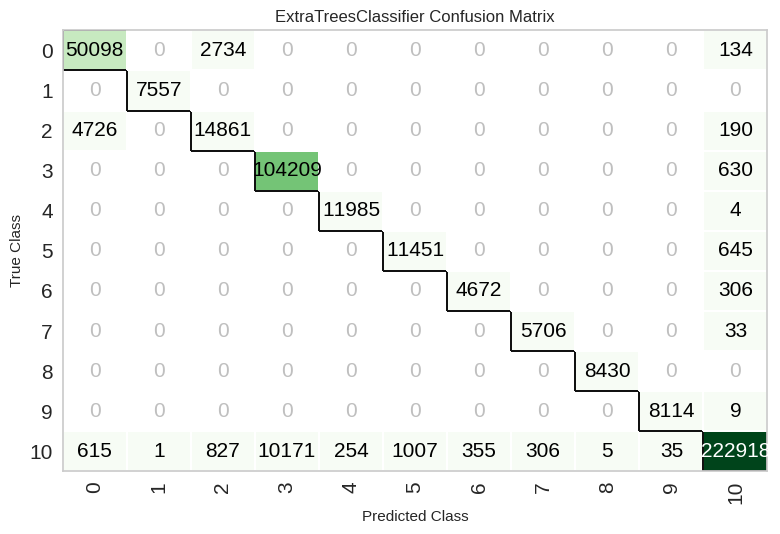

In [54]:
plot_model(et, plot = 'confusion_matrix')

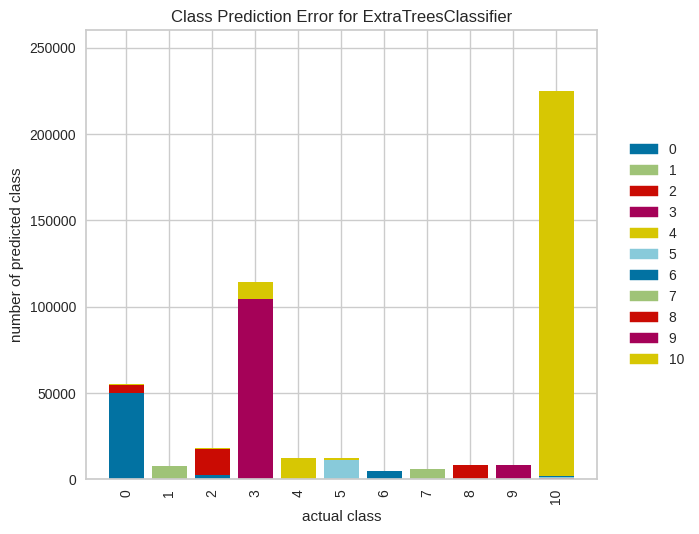

In [55]:
plot_model(et, plot = 'error')

In [56]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [57]:
et_val_pred = predict_model(et, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4375,0,0,0,0,0.0036,0.0048


In [58]:
save_model(et, 'et.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=No

# Light Gradient Boosting Machine

In [59]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6247,0.7103,0.6247,0.6395,0.6108,0.4574,0.4636
1,0.5084,0.7123,0.5084,0.7377,0.5844,0.3754,0.3987
2,0.9463,0.9853,0.9463,0.9485,0.9465,0.9225,0.9235
3,0.8999,0.9617,0.8999,0.9093,0.9007,0.8553,0.8577
4,0.9521,0.9922,0.9521,0.9537,0.9521,0.9307,0.9314
5,0.9157,0.9584,0.9157,0.9063,0.9094,0.8783,0.8793
6,0.9338,0.9772,0.9338,0.9357,0.9341,0.9043,0.9047
7,0.9534,0.9923,0.9534,0.9550,0.9535,0.9326,0.9333
8,0.9225,0.9630,0.9225,0.9288,0.9239,0.8882,0.8890


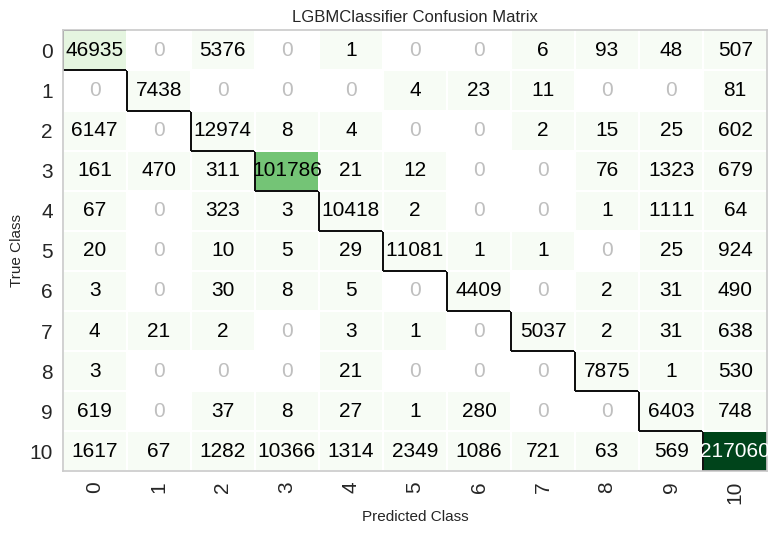

In [60]:
plot_model(lightgbm, plot = 'confusion_matrix')

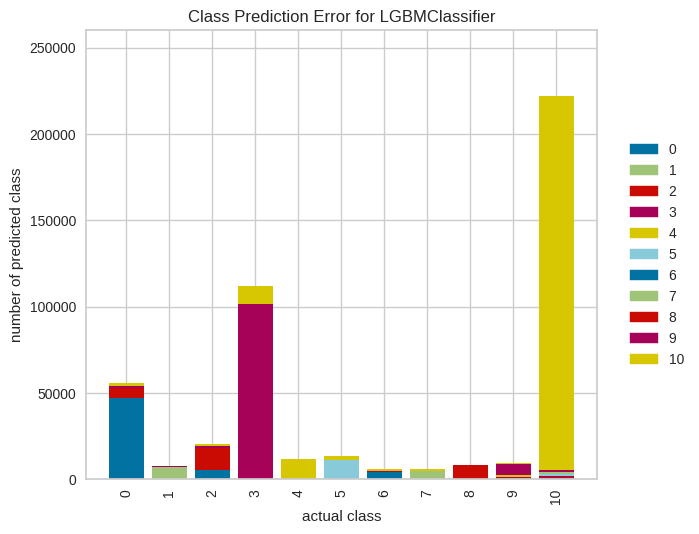

In [61]:
plot_model(lightgbm, plot = 'error')

In [62]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [63]:
lgbm_val_pred = predict_model(lightgbm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4168,0,0,0,0,-0.0164,-0.0211


In [64]:
save_model(lightgbm, 'lightgbm.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_

# MLP Classifier

In [65]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9520,0.9920,0.9520,0.9538,0.9518,0.9306,0.9315
1,0.9525,0.9920,0.9525,0.9544,0.9524,0.9314,0.9323
2,0.9529,0.9921,0.9529,0.9547,0.9529,0.9320,0.9328
3,0.9526,0.9922,0.9526,0.9545,0.9526,0.9315,0.9324
4,0.9522,0.9922,0.9522,0.9541,0.9521,0.9310,0.9319
5,0.9526,0.9923,0.9526,0.9546,0.9525,0.9315,0.9324
6,0.9524,0.9919,0.9524,0.9544,0.9523,0.9312,0.9321
7,0.9538,0.9922,0.9538,0.9552,0.9537,0.9331,0.9337
8,0.9525,0.9921,0.9525,0.9539,0.9524,0.9313,0.9319


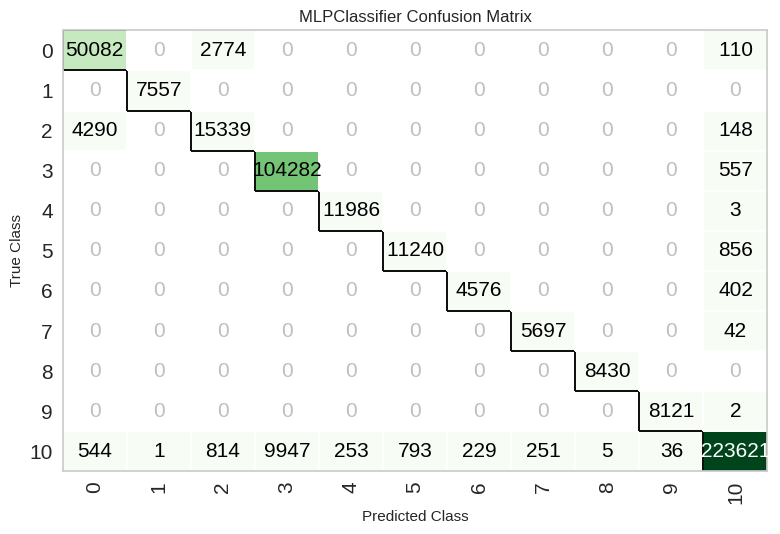

In [66]:
plot_model(mlp, plot = 'confusion_matrix')

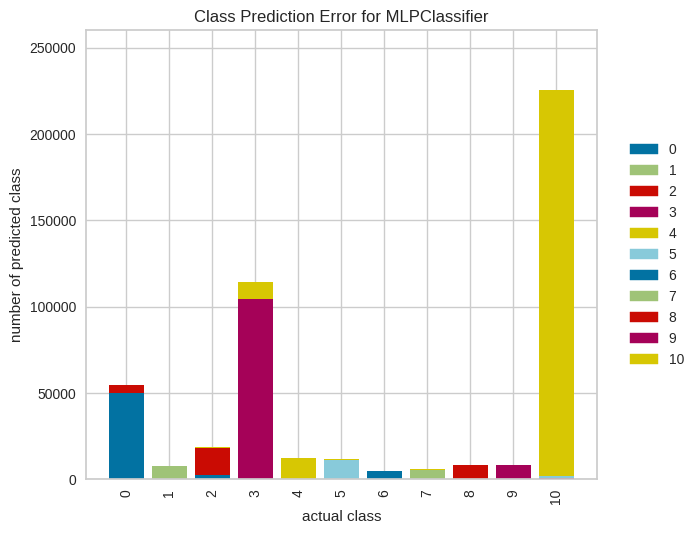

In [67]:
plot_model(mlp, plot = 'error')

In [68]:
plot_model(mlp, plot = 'parameter')

,Parameters
activation,relu
alpha,0.0001
batch_size,auto
beta_1,0.9
beta_2,0.999
early_stopping,False
epsilon,1e-08
hidden_layer_sizes,"(100,)"
learning_rate,constant
learning_rate_init,0.001


In [69]:
save_model(mlp, 'mlp.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(100,),
                                learning_rate='constant',
                

In [70]:
mlp_val_pred = predict_model(mlp, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.4461,0,0,0,0,-0.0007,-0.0011


In [71]:
save_model(mlp, 'mlp.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27'...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(100,),
                                learning_rate='constant',
                